<a href="https://colab.research.google.com/github/ElchinNasirov/house-price-predictor/blob/main/house_price_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install scikit-learn matplotlib pandas numpy

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [16]:
# loading data

# fetching boston housing
boston = fetch_openml(name="boston", version=1, as_frame=True)
df = boston.frame

# features (X), target (y = MEDV: median price)
X = df.drop("MEDV", axis=1)
y = df["MEDV"]

print("data shape", X.shape) # 506 rows, 13 features
print(df.head()) # First 5 rows
print(df.describe()) # Stats (mean, variance)

data shape (506, 13)
      CRIM    ZN  INDUS CHAS    NOX  ...    TAX  PTRATIO       B LSTAT  MEDV
0  0.00632  18.0   2.31    0  0.538  ...  296.0     15.3  396.90  4.98  24.0
1  0.02731   0.0   7.07    0  0.469  ...  242.0     17.8  396.90  9.14  21.6
2  0.02729   0.0   7.07    0  0.469  ...  242.0     17.8  392.83  4.03  34.7
3  0.03237   0.0   2.18    0  0.458  ...  222.0     18.7  394.63  2.94  33.4
4  0.06905   0.0   2.18    0  0.458  ...  222.0     18.7  396.90  5.33  36.2

[5 rows x 14 columns]
             CRIM          ZN       INDUS  ...           B       LSTAT        MEDV
count  506.000000  506.000000  506.000000  ...  506.000000  506.000000  506.000000
mean     3.613524   11.363636   11.136779  ...  356.674032   12.653063   22.532806
std      8.601545   23.322453    6.860353  ...   91.294864    7.141062    9.197104
min      0.006320    0.000000    0.460000  ...    0.320000    1.730000    5.000000
25%      0.082045    0.000000    5.190000  ...  375.377500    6.950000   17.025

In [17]:
# preprocessing data

print(df.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [19]:
# selecting features for simplicity (2 features: RM, LSTAT)
X = df[["RM", "LSTAT"]]

In [21]:
# spliting train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
# scaling features (StandardScaler for mean 0, std 1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
# building and training the model

# training
model = LinearRegression()
model.fit(X_train_scaled, y_train)

print("weights (w):", model.coef_) # coefficients for RM and LSTAT
print("bias (b):", model.intercept_)

weights (w): [ 3.87242241 -4.49173636]
bias (b): 22.796534653465343


In [28]:
# predict on test
y_pred = model.predict(X_test_scaled)

In [30]:
# evaluate the model

# computing metrics
mse = mean_squared_error(y_test, y_pred)
r2 = model.score(X_test_scaled, y_test)

print(f"mse: {mse:.2f}") # error measure
print(f"r2 score: {r2:.2f}") # fit quality




mse: 31.24
r2 score: 0.57


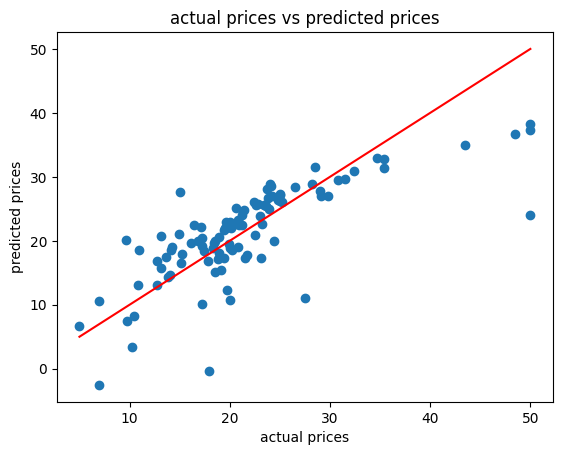

In [32]:
# visualizing results

# ploting actual vs. predicted, decision surface
plt.scatter(y_test, y_pred)
plt.xlabel("actual prices")
plt.ylabel("predicted prices")
plt.title("actual prices vs predicted prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color = "red") # perfect fit line


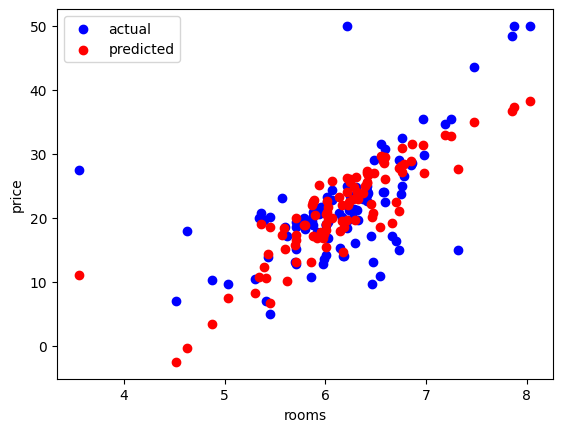

In [33]:
# feature plot (RM vs. Price)
plt.scatter(X_test["RM"], y_test, color = "blue", label = "actual")
plt.scatter(X_test["RM"], y_pred, color = "red", label = "predicted")
plt.xlabel("rooms")
plt.ylabel("price")
plt.legend()
plt.show()